<a href="https://colab.research.google.com/github/tringuyenCoding/MachineLearning/blob/colab/Part_4_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPLEMENTING A NEURAL NETWORK MODEL USING KERAS
Instructions:
- Start the kernel: In the menu bar, select Kernel -> Restart kernel.
- Complete all sections with the comment `YOUR CODE HERE`.
- Run all code blocks to check the implementation: In the menu bar, select Cell -> Run All.

A machine learning model should have at least the following 7 methods:

- `__init__`: the constructor function in object-oriented programming, used to initialize default parameters or the starting parameters of a model. In the initial exercises, the constructor may not be used for simplicity.
- `build`: constructs the architecture of the model.
- `train`: starts the training process of the model.
- `save`: saves the trained model.
- `load`: loads a pretrained model from a file.
- `summary`: prints a summary of the model's architecture.
- `predict`: predicts the output value given input data.

In [1]:
# The general implementation of the model includes 7 basic methods.
# Note: This model is just a suggestion and not mandatory.
# However, in the exercise section, it is required to adhere to these method names.
class MyModel:
    # constructor
    def __init__(self):
        return None

    # Implement architecture of the model
    def build(self):
        return None

    # Train the defined model with training and validation data
    def train(self):
        return None

    # Save the trained model to file
    def save(self, model_path):
        return None

    # Load pretrained model from file
    def load(self):
        return None
    # Visualize your model
    def summary(self):
        return None

    # Apply your model with new input data
    def predict(self):
        return None

## Step 1. Import the Keras libraries

First, let's import the necessary libraries, modules, and functions from `Keras`:
- `Input`: to receive input data for the model
- `Dense`: also known as the Fully Connected layer, an important component of Neural Network-based models.
- `Model`: this is the model object class used to encapsulate the input and output layers, then train with the `fit` method and predict results with `predict`.
- `load_model`: a function used to load a model from a file.

In [2]:
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model
import numpy as np

## Step 2. Implementing the Neural Network model

Next, we will use the `MyModel` object framework presented in the previous section to implement the **Neural Network** model. The main method that needs to be implemented for this exercise is `def build()`. The remaining methods have already been implemented, and you should read and understand their meanings and how to use them for future reference.

<p align="center">
  <img src="NeuralNet.png" />
</p>

In [3]:
# Neural Network
class NeuralNetwork:
    def __init__(self): # Self is similar to your 'this' pointer in C++
        return None

    def build(self, input_dim, output_dim, n_hidden, n_neurons):
        # `input_dim`: Size of the input feature
        # `output_dim`: Number of classes to classify
        # `n_hidden`: Number of hidden layers
        # `n_neurons`: Number of neurons per hidden layer

        # Khởi tạo model
        self.model = None

        # Implement to define the ARCHITECTURE OF THE MODEL and store it in the `self.model` attribute
        # with the following object variables:
        #   - create a variable `input` using the `Input` object of Keras,
        #     passing the input dimension `input_dim`
        #   - create `n_hidden` hidden layers, where each hidden layer has `n_neurons` and uses bias
        #     activation function is `sigmoid`. The output of each hidden layer is the input of the next hidden layer.
        #   - create a variable `output` using the `Dense` object of Keras,
        #     passing the parameters: output dimension (note MULTI-CLASSIFICATION),
        #     using bias, using activation function `softmax`. The input of the output layer is the last hidden layer.
        # After this step, self.model will wrap the `input` and `output` variables to create the model.
        ### YOUR CODE HERE
        input = Input(shape=(input_dim,))
        hidden = Dense(n_neurons, activation='sigmoid',use_bias=True)(input)
        for _ in range(1,n_hidden ,1):
            hidden = Dense(n_neurons, activation='sigmoid',use_bias=True)(hidden)
        output = Dense(output_dim, activation = 'softmax', use_bias = True)(hidden)
        self.model = Model(inputs=input, outputs=output)
        return self.model

    def train(self, x_train, y_train, epochs=500):
        # Initialize with default values: `epochs=50`, `learning_rate=0.05`
        opt = tf.keras.optimizers.SGD(learning_rate=0.05) # Stochastic Gradient Descent
        self.model.compile(optimizer=opt, loss='categorical_crossentropy') # CCE loss
        return self.model.fit(x_train, y_train, epochs=epochs)

    def save(self, model_file):
        return self.model.save(model_file)

    def load(self, model_file):
        self.model = load_model(model_file)

    def summary(self):
        self.model.summary()

    def predict(self, x_test):
        return self.model.predict(x_test)

    def get_weights(self, layer_id):
        return self.model.layers[layer_id].get_weights()

Next, we will instantiate the NeuralNetwork object and test whether the `build` method has been implemented correctly.

In [4]:
nn = NeuralNetwork()
# In this example, we will initialize the input as a 1000-dimensional vector,
# and the problem requires classification of 20 classes. The number of hidden layers is 3
# and the number of neurons in each hidden layer is 10.
nn.build(1000, 20, 3, 10)

In [5]:
# # Check the overall network architecture consisting of 2 + 3 = 5 layers: Input, 3 hidden layers, and Output.
assert len(nn.model.layers)==5
assert str(type(nn.model.layers[0]))== "<class 'keras.engine.input_layer.InputLayer'>"
assert str(type(nn.model.layers[1]))== "<class 'keras.layers.core.dense.Dense'>"
assert str(type(nn.model.layers[2]))== "<class 'keras.layers.core.dense.Dense'>"
assert str(type(nn.model.layers[3]))== "<class 'keras.layers.core.dense.Dense'>"
assert str(type(nn.model.layers[4]))== "<class 'keras.layers.core.dense.Dense'>"
assert nn.model.layers[0].input_shape[0][1] == 1000
assert nn.model.layers[-1].output_shape[1] == 20
assert nn.model.layers[1].use_bias == True

AssertionError: 

In [ ]:
# Test with hidden test cases.


## Step 3. Generate Sample Data (Toy Example)
Next, we will generate sample data for training and testing.

The data is generated as randomly scattered points around 4 clusters:
- [10, -2]
- [2, 8]
- [12, 8]
- [-2, 0]

Note that these 4 clusters are far enough apart so that when adding random noise,
the points belonging to these 4 clusters still do not intersect with each other.

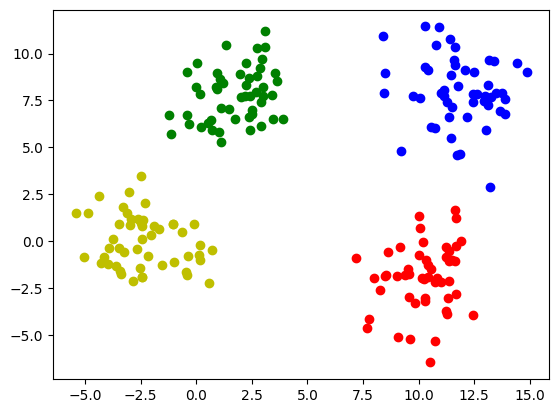

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Number of classes: 4
K = 4
# Create a dataset consisting of 4 points
# S1, S2, S3, S4 are the centers of the 4 classes
S1= np.array([[10,-2]])
S2= np.array([[2,8]])
S3= np.array([[12,8]])
S4= np.array([[-2,0]])

# 50 samples for each class
n_sample = 50
# Generate points with random noise around the 4 centers
pts1 = S1 + np.random.normal(0, 1.5, size=(n_sample,2))
pts2 = S2 + np.random.normal(0, 1.5, size=(n_sample,2))
pts3 = S3 + np.random.normal(0, 1.5, size=(n_sample,2))
pts4 = S4 + np.random.normal(0, 1.5, size=(n_sample,2))

# Concatenate all samples into a single data block X (input features) and Y (labels)
X_train = np.concatenate((pts1, pts2, pts3, pts4))
# Concatenate data labels to a single input variable Y
Y_train = np.concatenate(([0]*n_sample, [1]*n_sample, [2]*n_sample, [3]*n_sample))

# Convert Y from label form to one-hot vectors
Y_train = Y_train.astype(int)
Y_oh = np.zeros((Y_train.size, Y_train.max()+1 ))
Y_oh[np.arange(Y_train.size), Y_train] = 1

# Visualize the data using colored circles: red, green, blue, and yellow
plt.plot(pts1[:,0], pts1[:,1], 'ro')
plt.plot(pts2[:,0], pts2[:,1], 'go')
plt.plot(pts3[:,0], pts3[:,1], 'bo')
plt.plot(pts4[:,0], pts4[:,1], 'yo')
plt.show()


## Step 4. Training the Model with Sample Data

Next, we will initialize the model to match the generated sample data. The architecture of the model should be compatible with the dimensions of the sample data.

In [7]:
nn = NeuralNetwork()

# Call the `build` method for the `sr` object and pass the corresponding input parameters
# based on the generated training data in the previous code block.
# According to you, what are `input_dim` and `output_dim`?
# For the hidden layers, we initialize 1 hidden layer and 3 neurons for each hidden layer.

### YOUR CODE HERE
nn.build(input_dim=2, output_dim=4, n_hidden=1, n_neurons=3)
# To display the architecture of the model, we call the `summary` method.
print("The architecture of the Neural Network model:")
nn.summary()

The architecture of the Neural Network model:
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 4)                 16        
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the result when the `nn` object calls the `build` method


In [8]:
# To train the model, we call the `train` method with the generated sample data.
# If the `build` step of the model is called correctly, the subsequent `train` step will be successful.
# NOTE: Here we use the one-hot encoded form Y_oh as the output instead of the label form.
hist = nn.train(X_train, Y_oh)

Epoch 1/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6450
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 1.5506
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 1.4501
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 1.3850
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 1.3428
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 1.3088
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 1.2802
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 1.2509
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 1.2241
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 1.1996
Epoch 11/500
7/7 [==============================] - 0s 3ms/step - loss: 1.1758
Epoch 12/500
7/7 [==============================] - 0s 2ms/step - loss: 1.1528
Epoch 13/500
7/7 [==============================] - 0s 2ms/st

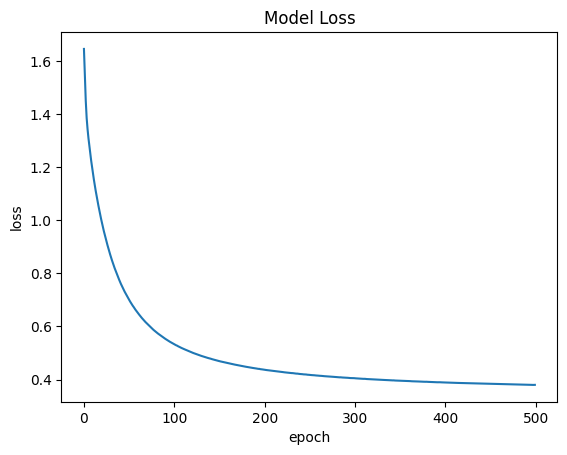

In [9]:
# Display the loss over the number of epochs
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [10]:
# After training, we save the model for future reuse.
# Note: the two methods `save` and `load` are used when we want to reuse the model multiple times without retraining.
nn.save('neural_network_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Step 5. Visualize the model and make predictions with test data

In [11]:
# Initialize a new object and call the `load` method to load the model from a file
pretrain_nn = NeuralNetwork()
pretrain_nn.load('neural_network_model.h5')

In [12]:
# Print the optimized parameters of the last layer
theta = pretrain_nn.get_weights(-1)
print('Optimized parameters: ')
print(theta)

Optimized parameters: 
[array([[-0.8303636 , -1.0516405 , -0.4986393 ,  4.0099354 ],
       [-0.24731775, -2.0603292 , -0.9973321 ,  2.3426619 ],
       [-2.9172754 ,  4.7875056 , -2.4315984 ,  0.9354713 ]],
      dtype=float32), array([ 1.7364073, -1.414773 ,  1.7471334, -2.0687733], dtype=float32)]


20/20 [==============================] - 0s 1ms/step


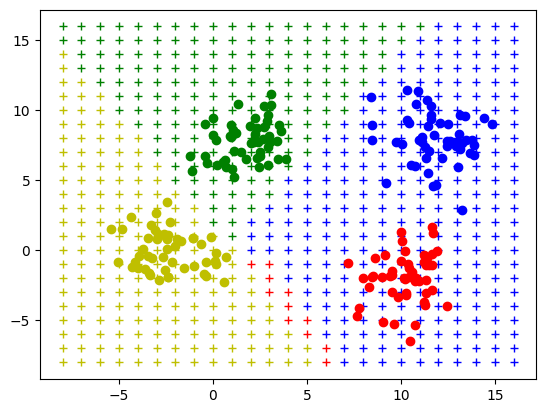

In [13]:
# Visualize the data and the trained model
# Idea: Sample dense points within the range of the training data
# Then use the model to make predictions and display the results

# `colors` are the markers used to visualize the test results
colors = ['r+', 'g+', 'b+', 'y+']
# `gt_colors` are the markers used to visualize the training data
gt_colors = ['ro', 'go', 'bo', 'yo']

# Sample dense points
x = np.arange(-8, 17, 1)
y = np.arange(-8, 17, 1)
xx, yy = np.meshgrid(x,y)

xx = xx.reshape(-1)
yy = yy.reshape(-1)

# Generate dense test data
X_test = np.concatenate([[xx],[yy]], axis=0).T
Y_pred = pretrain_nn.predict(X_test)

for i in range(len(xx)):
    plt.plot(xx[i],yy[i], colors[np.argmax(Y_pred[i])])
plt.plot(pts1[:,0], pts1[:,1], gt_colors[0])
plt.plot(pts2[:,0], pts2[:,1], gt_colors[1])
plt.plot(pts3[:,0], pts3[:,1], gt_colors[2])
plt.plot(pts4[:,0], pts4[:,1], gt_colors[3])
plt.show()

We can see that the 2D plane has been classified using the previously trained Neural Network model. Based on the plot, we can observe that the results are quite accurate, except for some points at the boundaries between classes.

## Step 6. Testing with MNIST dataset

MNIST is a classic dataset of handwritten digits widely used in machine learning. To download and use this dataset, it is incredibly simple with just 2 lines of code:

In [14]:
# Prepare MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


To gain a better understanding of this dataset, let's visualize the data by displaying images and examining their dimensions.

The label of the 1234th data sample is:  3
The size of the training images is:  (28, 28)
The number of image points when transformed into a vector is:  784


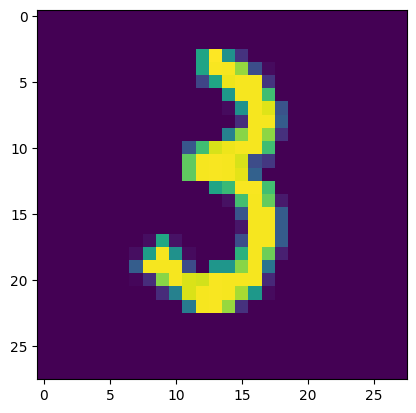

In [15]:
plt.imshow(x_train[1234])
print('The label of the 1234th data sample is: ', y_train[1234])
print('The size of the training images is: ', x_train[1234].shape)
print('The number of image points when transformed into a vector is: ',
      x_train[1234].shape[0]*x_train[1234].shape[1])

To preprocess the data before training the model, you can perform the following steps:

1. Convert the output labels to one-hot vectors: This can be done using one-hot encoding, where each label is represented as a binary vector with a value of 1 in the corresponding class index and 0 in other indices.

2. Normalize the input data to the range [0-1]: This can be achieved by dividing each pixel value by the maximum pixel value (255 in the case of MNIST dataset), so that all pixel values are scaled to the range [0-1].

Performing these preprocessing steps will help in improving the training process and the performance of the model.

In [16]:
# The function to convert the output from label format to one-hot vector
def onehot(y):
    oh = np.zeros((y.shape[0], y.max()+1))
    oh[np.arange(y.shape[0]), y] = 1
    return oh

y_train_oh = onehot(y_train)
y_test_oh = onehot(y_test)

# Normalize the input data for both the training and testing datasets.
n_train_sample, h, w = x_train.shape
n_test_sample, _,_ = x_test.shape # Ensure that all samples have the same width and height dimensions.

x_train = (x_train.astype('float32')) / 255.0
x_test = (x_test.astype('float32')) / 255.0
x_train_vec = x_train.reshape((n_train_sample, w*h))
x_test_vec = x_test.reshape((n_test_sample, w*h))

To initialize a model from scratch that is suitable for the MNIST dataset, with the following configuration details regarding the hidden layers:

- 2 hidden layers
- 100 neurons in each hidden layer
- Training for 30 epochs

In [20]:
nn4mnist = NeuralNetwork()

# Completing the following code snippet by using the variable `nn4mnist` to call the `build` and `train` methods. Note: Use the appropriate parameters as specified.

### YOUR CODE HERE
nn4mnist.build(input_dim=784, output_dim=10, n_hidden=2, n_neurons=100)
hist = nn4mnist.train(x_train_vec, y_train_oh, 30)


Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3226
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4603
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3474
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2750
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2526
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2336
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2170
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2022
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1893
Epoch 11/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1776
Epoch 12/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1673
E

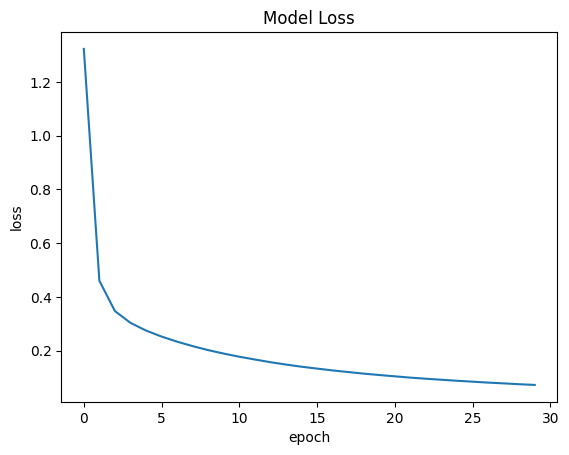

In [21]:
# Visualizing the loss values during the training process.
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [22]:
# Preliminary check of the variable `hist`: if the initialization and training process are successful, the following tests should pass.
print(len(hist.history['loss']))
assert hist is not None
assert 'loss' in hist.history
assert len(hist.history['loss']) == 30

30


In [ ]:
# Test with hidden test cases.


After training the model, we can use it to make predictions on the test data. Let's make predictions on a sample test data:

In [23]:
pred = nn4mnist.predict(x_test_vec)

313/313 [==============================] - 1s 2ms/step


Let's visualize a sample test data (e.g., the 50th sample).

Label of the data:  6
Predicted label of the data:  6


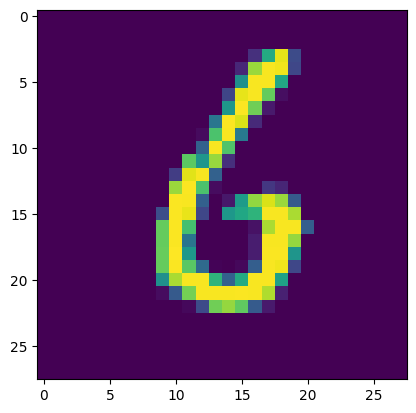

In [24]:
# Show the 50-th test sample
test_id = 50
plt.imshow(x_test[test_id])
print('Label of the data: ', y_test[test_id])
print('Predicted label of the data: ', np.argmax(pred[test_id]))